Load Training File Start...
Load Test Data Start...
Load Data OK...


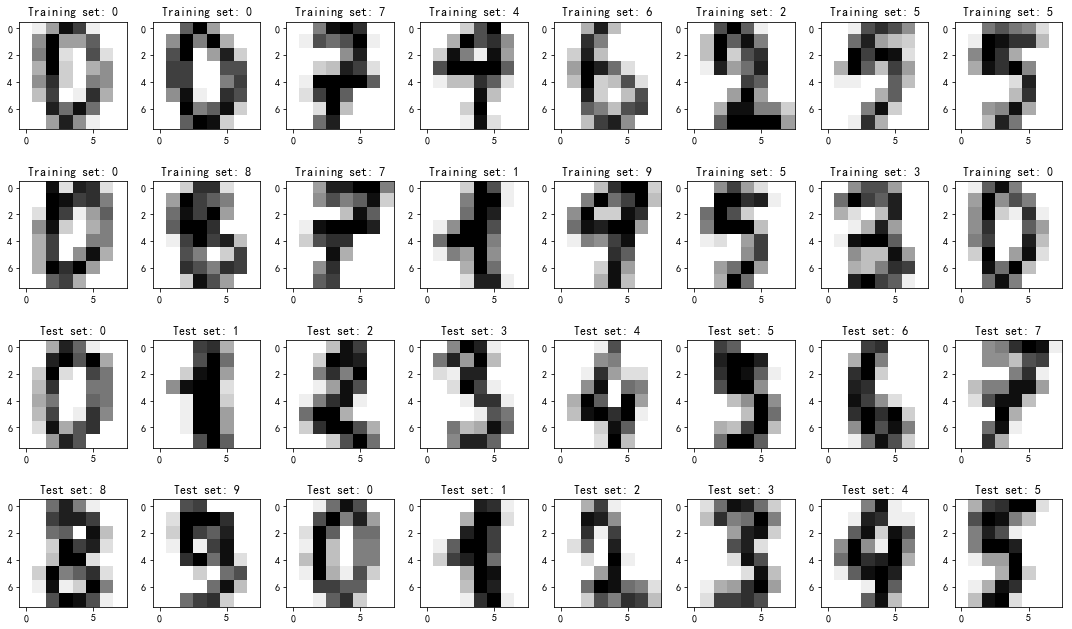

Start Learning...
Training time：0minutes, 0.876seconds
Learning is OK...
Training setAccuracy：100.00%
[0 1 2 ..., 8 9 8]
[0 1 2 ..., 8 9 8]
Test setAccuracy：98.27%
[9 1 1 1 1 9 5 9 9 9 9 9 9 8 1 0 1 3 8 9 9 3 5 9 1 7 3 5 8 5 1]
[5 2 2 2 8 7 7 5 7 7 7 7 7 1 8 6 8 9 9 3 8 8 8 7 8 3 9 9 3 3 8]


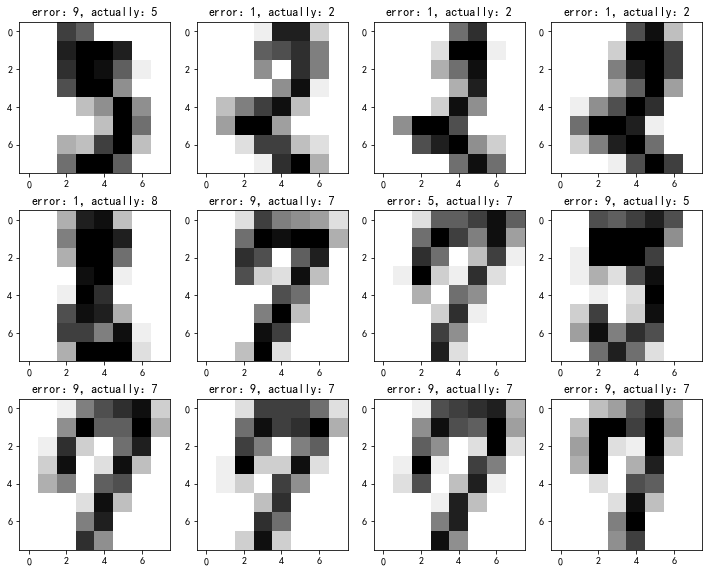

In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import time


def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print tip + 'Accuracy：%.2f%%' % (100*np.mean(acc))


def save_image(im, i):
    im *= 15.9375
    im = 255 - im
    a = im.astype(np.uint8)
    output_path = '.\\HandWritten'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('\\%d.png' % i))


if __name__ == "__main__":
    print 'Load Training File Start...'
    data = np.loadtxt('optdigits.tra', dtype=np.float, delimiter=',')
    x, y = np.split(data, (-1, ), axis=1)
    images = x.reshape(-1, 8, 8)
    y = y.ravel().astype(np.int)

    print 'Load Test Data Start...'
    data = np.loadtxt('optdigits.tes', dtype=np.float, delimiter=',')
    x_test, y_test = np.split(data, (-1, ), axis=1)
    images_test = x_test.reshape(-1, 8, 8)
    y_test = y_test.ravel().astype(np.int)
    print 'Load Data OK...'

    # x, x_test, y, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
    # images = x.reshape(-1, 8, 8)
    # images_test = x_test.reshape(-1, 8, 8)

    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(15, 9), facecolor='w')
    for index, image in enumerate(images[:16]):
        plt.subplot(4, 8, index + 1)
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(u'Training set: %i' % y[index])
    for index, image in enumerate(images_test[:16]):
        plt.subplot(4, 8, index + 17)
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        save_image(image.copy(), index)
        plt.title(u'Test set: %i' % y_test[index])
    plt.tight_layout()
    plt.show()

    params = {'C':np.logspace(0, 3, 7), 'gamma':np.logspace(-5, 0, 11)}
    # model = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=params, cv=3)
    model = svm.SVC(C=10, kernel='rbf', gamma=0.001)
    print 'Start Learning...'
    t0 = time()
    model.fit(x, y)
    t1 = time()
    t = t1 - t0
    print 'Training time：%dminutes, %.3fseconds' % (int(t/60), t - 60*int(t/60))
    # print 'optimal parameters：\t', model.best_params_
    #clf.fit(x, y)
    print 'Learning is OK...'
    y_hat = model.predict(x)
    show_accuracy(y, y_hat, 'Training set')
    # print accuracy_score(y, y_hat)
    y_test_hat = model.predict(x_test)
    print y_test_hat
    print y_test
    show_accuracy(y_test, y_test_hat, 'Test set')

    err_images = images_test[y_test != y_test_hat]
    err_y_hat = y_test_hat[y_test != y_test_hat]
    err_y = y_test[y_test != y_test_hat]
    print err_y_hat
    print err_y
    plt.figure(figsize=(10, 8), facecolor='w')
    for index, image in enumerate(err_images):
        if index >= 12:
            break
        plt.subplot(3, 4, index + 1)
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(u'error：%i，actually：%i' % (err_y_hat[index], err_y[index]))
    plt.tight_layout()
    plt.show()

